In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif


# Load the dataset (features already extracted)
path = "/Users/nathalylamas/Documents/Bootcamp/Homework/ML_data.csv"
df = pd.read_csv(path)

df.head()



,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [19]:
#for better accuracy
df_new = df.drop(columns=['filename', 'label'])  

X = df_new.values 
y = df["label"].values

#Source: ChatGPT Recommendations to do a label for better accuracy, OpenAI, January 2025.

In [21]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [23]:
# Scale the numerical feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [25]:
# Proceed with model training
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(X_train_scaled, y_train)
y_pred = model1.predict(X_test_scaled)

# Print classification report
print("Decision Tree Model:")
print(classification_report(y_test, y_pred))



Decision Tree Model:
              precision    recall  f1-score   support

       blues       0.60      0.57      0.58       208
   classical       0.85      0.84      0.85       203
     country       0.53      0.54      0.53       186
       disco       0.56      0.56      0.56       199
      hiphop       0.67      0.64      0.65       218
        jazz       0.66      0.71      0.69       192
       metal       0.74      0.76      0.75       204
         pop       0.71      0.79      0.75       180
      reggae       0.69      0.61      0.65       211
        rock       0.49      0.50      0.49       197

    accuracy                           0.65      1998
   macro avg       0.65      0.65      0.65      1998
weighted avg       0.65      0.65      0.65      1998



In [27]:
# Train Random Forest model
model2 = RandomForestClassifier(n_estimators=100)
model2.fit(X_train_scaled, y_train)
y_pred = model2.predict(X_test_scaled)
print("Random Forest Model:")
print(classification_report(y_test, y_pred))

X_train = np.array(X_train_scaled)
X_test = np.array(X_test_scaled)
y_train = np.array(y_train)
y_test = np.array(y_test)



Random Forest Model:
              precision    recall  f1-score   support

       blues       0.90      0.86      0.88       208
   classical       0.93      0.98      0.95       203
     country       0.75      0.82      0.79       186
       disco       0.87      0.85      0.86       199
      hiphop       0.92      0.88      0.90       218
        jazz       0.85      0.91      0.88       192
       metal       0.87      0.96      0.91       204
         pop       0.93      0.94      0.93       180
      reggae       0.89      0.88      0.89       211
        rock       0.89      0.73      0.80       197

    accuracy                           0.88      1998
   macro avg       0.88      0.88      0.88      1998
weighted avg       0.88      0.88      0.88      1998



In [28]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_model = xgb.XGBClassifier(n_estimators=100)
xgb_model.fit(X_train, y_train_encoded)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_xgb)

print("XGBoost Model:")
print(classification_report(y_test, y_pred_decoded))

# Source: ChatGPT Recommendations and our TA Andrew, OpenAI, January 2025.
# Source: https://www.ibm.com/think/topics/xgboost



XGBoost Model:
              precision    recall  f1-score   support

       blues       0.90      0.89      0.89       208
   classical       0.93      0.97      0.95       203
     country       0.81      0.87      0.84       186
       disco       0.89      0.90      0.90       199
      hiphop       0.96      0.90      0.93       218
        jazz       0.88      0.92      0.90       192
       metal       0.94      0.96      0.95       204
         pop       0.95      0.96      0.96       180
      reggae       0.93      0.91      0.92       211
        rock       0.91      0.84      0.87       197

    accuracy                           0.91      1998
   macro avg       0.91      0.91      0.91      1998
weighted avg       0.91      0.91      0.91      1998



In [30]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=30)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

X_train_rnn = X_train_selected.reshape((X_train_selected.shape[0], X_train_selected.shape[1], 1))
X_test_rnn = X_test_selected.reshape((X_test_selected.shape[0], X_test_selected.shape[1], 1))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [49]:
# RNN model
rnn_model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, activation='relu', return_sequences=True), input_shape=(X_train_rnn.shape[1], 1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='relu')),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(np.unique(y_train_encoded)), activation='softmax')
])

rnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
rnn_model.fit(X_train_rnn, y_train_encoded, epochs=100, batch_size=32,
              validation_data=(X_test_rnn, y_test_encoded),
              callbacks=[early_stopping])

rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, y_test_encoded)
print(f'RNN Model Accuracy: {rnn_accuracy * 100:.2f}%')

#Source: ChatGPT Recommendations, OpenAI, January 2025 and Gitlab: https://git.bootcampcontent.com/University-of-California---Berkeley/UCB-VIRT-DATA-PT-07-2024-U-LOLC/-/blob/main/21-Neural-Networks-Deep-Learning/1/Activities/Extra_Solved.ipynb?ref_type=heads

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.2240 - loss: 2.0826 - val_accuracy: 0.3519 - val_loss: 1.6856
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.3731 - loss: 1.6872 - val_accuracy: 0.4419 - val_loss: 1.5276
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.4237 - loss: 1.5623 - val_accuracy: 0.4825 - val_loss: 1.4156
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.4704 - loss: 1.4339 - val_accuracy: 0.5180 - val_loss: 1.3316
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.5004 - loss: 1.3789 - val_accuracy: 0.5230 - val_loss: 1.3084
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.5302 - loss: 1.3047 - val_accuracy: 0.5450 - val_loss: 1.2598
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.5307 - loss: 1.2959 - val_accuracy: 0.5350 - val_loss: 1.2350
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.5439 - loss: 1.2655 - val_

In [45]:
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz


In [47]:
# Proceed with model training
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(X_train_scaled, y_train)
y_pred = model1.predict(X_test_scaled)

# Print classification report
print("Decision Tree Model:")
print(classification_report(y_test, y_pred))



Decision Tree Model:
              precision    recall  f1-score   support

       blues       0.63      0.58      0.60       208
   classical       0.85      0.84      0.85       203
     country       0.50      0.51      0.50       186
       disco       0.54      0.58      0.56       199
      hiphop       0.69      0.64      0.66       218
        jazz       0.63      0.70      0.66       192
       metal       0.75      0.73      0.74       204
         pop       0.70      0.78      0.74       180
      reggae       0.68      0.60      0.63       211
        rock       0.46      0.48      0.47       197

    accuracy                           0.64      1998
   macro avg       0.64      0.64      0.64      1998
weighted avg       0.65      0.64      0.64      1998



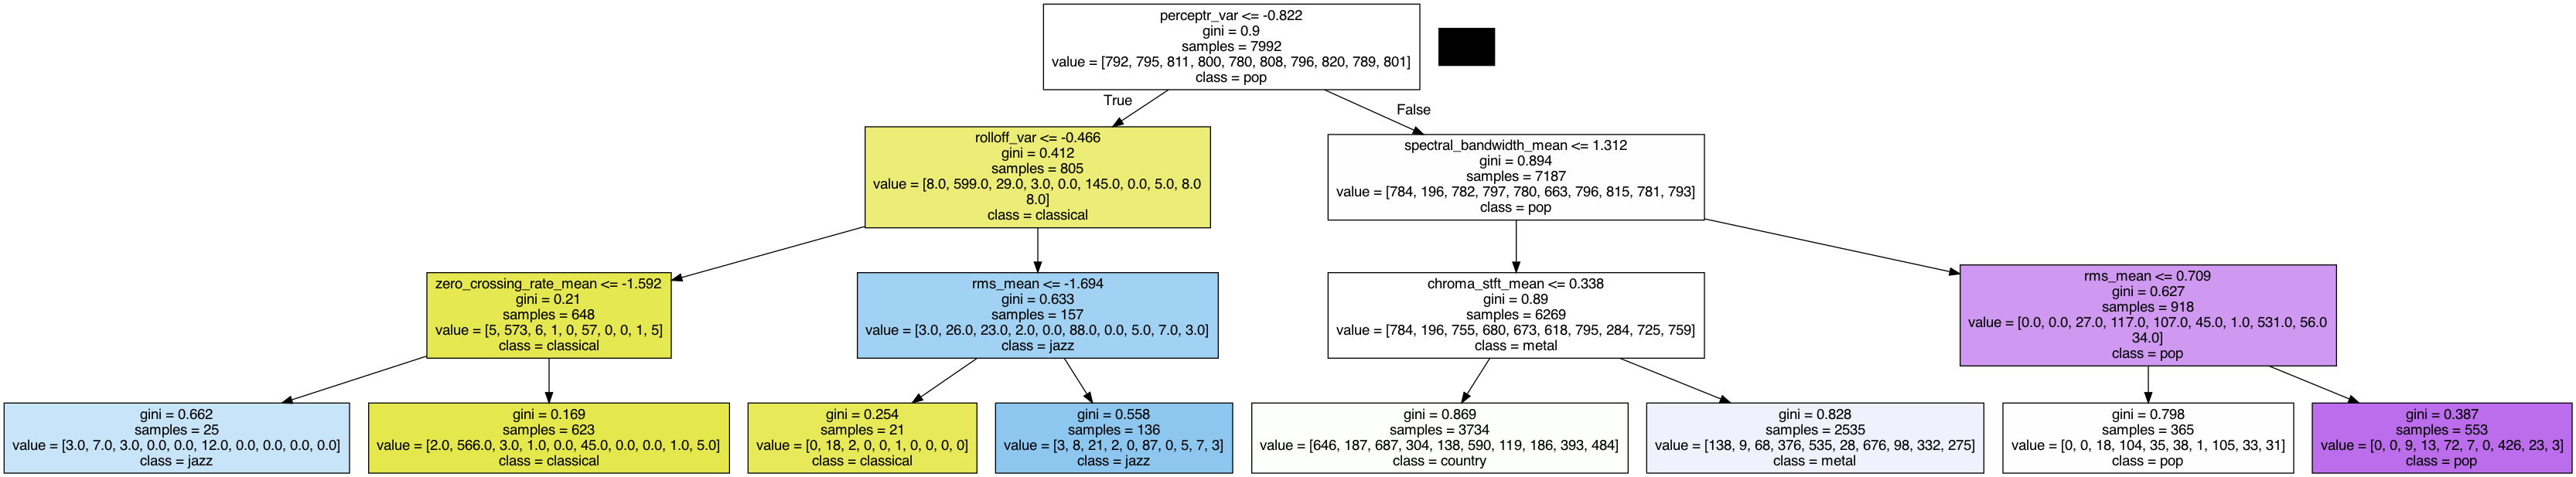

In [43]:
#class name classification -- Source: ChatGPT Recommendations, OpenAI, January 2025.
class_names = [str(cls) for cls in np.unique(y_train)]

#Draw the graph from the class assigment 
dot_data = export_graphviz(
    model1, out_file=None, feature_names=df_new.columns, class_names=class_names, filled=True
)


graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [49]:
file_path = "/Users/nathalylamas/Documents/Bootcamp/Homework/music_decisiontree.png"
graph.write_png(file_path)

True